In [0]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as st
import statsmodels.api as sm
import datetime
import holidays
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

Set the path to working directory.

In [0]:
path = ''
os.chdir(path)

Import the dataset.

In [0]:
# Population dataset
# Statistics Canada.  Table  17-10-0009-01   Population estimates, quarterly

# population_data = pd.read_csv('population_by_country_2020.csv')
# canada_total_population = population_data[population_data["GEO"] == "Canada"]["VALUE"]

In [0]:
population_data = pd.read_csv('population_by_country_2020.csv')

In [0]:
confirmed_data = pd.read_csv('csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_data = pd.read_csv('csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
fatality_data = pd.read_csv('csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [359]:
display(confirmed_data.isna().sum())
print('\n')
display(recovered_data.isna().sum())
print('\n')
display(fatality_data.isna().sum())

Province/State    182
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/19/20             0
4/20/20             0
4/21/20             0
4/22/20             0
4/23/20             0
Length: 97, dtype: int64

Province/State    183
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/19/20             0
4/20/20             0
4/21/20             0
4/22/20             0
4/23/20             0
Length: 97, dtype: int64

Province/State    182
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/19/20             0
4/20/20             0
4/21/20             0
4/22/20             0
4/23/20             0
Length: 97, dtype: int64

It can be seen that there are a lot of empty entries for Province/State so it would be reasonable to remove this feature. Longitute and latitude would not provide any important information because the analysis is on country level.

Let's combine the data for each country into single entry.

In [0]:
confirmed = confirmed_data.groupby('Country/Region').sum()
recovered = recovered_data.groupby('Country/Region').sum()
fatality = fatality_data.groupby('Country/Region').sum()

In [361]:
display(confirmed)
display(confirmed.T.describe())
print('\n')
print('Confirmed cases global mean: ', round(confirmed.T.describe().T['mean'].mean()))

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,38,39,41,44,47,48,52,59,59,59,84,91,98,109,116,119,134,161,194,217,237,254,261,263,263,267,268,290,308,308,374,374,402,418,437,449,466,474,480
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,174.463158,134.571806,521.786247,176.379243,4.964960,4.897520,588.220707,294.769551,1875.367293,4159.958593,268.944421,11.290926,394.069237,302.053066,18.143692,747.638560,7963.703508,2.701586,8.732879,2.967872,88.801275,266.195737,3.045857,6332.124628,51.897505,209.875997,133.607123,16.293392,1.416272,7.615758,43.204913,209.856317,6675.085598,3.079479,5.380909,1941.987178,64255.029015,714.971301,22.102320,63.723373,...,1499.631579,87.000474,1017.852867,4.313815,4.459796,1080.022280,232.709137,373.275228,21.572123,676.803979,1.096674,47540.957895,70.926316,11.274531,2.798858,3029.873684,7568.389955,7.871567,142.902105,24.331787,750.178947,3.408982,19.941519,33.815466,198.410526,14416.160074,144070.982919,15.684211,815.626789,1111.842105,22090.916897,140.102225,240.020661,60.977201,94.126316,91.801952,1.171892,0.821780,13.882806,4.778947
std,319.126228,198.194781,874.965703,261.749953,8.341226,11.027637,966.745141,452.767173,2617.898945,5786.392011,471.178856,22.075024,585.318764,824.634032,29.389549,1753.592457,12985.879722,8.880476,15.010278,9.685744,168.441750,434.096788,6.907880,12197.382337,60.529900,311.009406,205.347298,33.627146,3.750128,19.013007,52.817610,372.136744,11792.577383,4.733608,9.707466,3332.337152,28832.310134,1250.814827,45.843751,106.071447,...,2991.338009,130.518492,1925.668660,7.131296,12.362356,2214.497499,365.684453,494.830759,62.403464,1065.480261,3.520707,70861.834233,97.885435,28.793215,7.517556,4736.124916,10487.188673,13.200414,156.941498,60.050633,1042.651224,13.965442,30.547814,48.204834,308.561918,27823.920186,251779.180568,23.535064,1688.233271,2192.534428,39293.133595,201.083749,481.664680,88.242150,103.614593,140.323884,3.521919,5.203897,21.868089,8.795767
min,0.000000,0.000000,0.000000,0.000000,-11.202700,-61.796400,-63.616700,0.000000,-255.969500,0.000000,0.000000,-77.396300,0.000000,0.000000,-59.543200,0.000000,0.000000,-59.543200,0.000000,0.000000,-63.588700,0.000000,-22.328500,-51.925300,0.000000,0.000000,-1.561600,0.000000,-3.373100,-23.041800,0.000000,0.000000,-1237.628900,0.000000,0.000000,-71.543000,548.000000,-74.297300,-4.038300,-4.038300,...,0.000000,-14.452400,0.000000,-4.679600,-11.779889,0.000000,0.000000,0.000000,0.000000,-30.559500,0.000000,-4.000000,0.000000,0.000000,-56.027800,0.000000,0.000000,0.000000,1.000000,-6.369000,2.000000,-8.874217,0.000000,-61.222500,0.000000,0.000000,-



Confirmed cases global mean:  2986


In [362]:
display(recovered)
display(recovered.T.describe())
print('\n')
print('Recovered cases global mean: ', round(recovered.T.describe().T['mean'].mean()))

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,17,17,17,17,17,17,17,18,18,18,18,18,18,21,21,25,24,42,44,44,45,57,58,58,62,63,63,69,69,71,71,71,71,92
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,15.873684,54.940227,143.270458,31.695033,0.975486,0.034362,131.578602,68.411656,564.535714,1659.748066,85.818105,0.964611,180.290289,14.495172,2.396323,66.743823,1579.629824,-0.351045,2.943405,1.704714,2.243380,50.058895,0.024804,1898.914102,26.286979,23.118102,49.922913,1.903918,0.447851,0.121021,21.362807,36.687896,1827.239827,0.932111,1.159857,591.597704,43951.713225,90.381827,1.902320,4.544425,...,225.231579,39.537316,57.968657,0.913815,0.322954,183.380175,26.498611,35.064702,1.056334,122.635558,0.401937,15360.726316,16.778947,1.495583,0.346226,90.778947,3108.821534,1.713673,38.038947,2.015998,341.673684,1.377403,8.394151,2.783887,13.210526,1425.612705,10097.582919,3.421053,38.511000,185.463158,116.801107,50.144331,33.220661,23.745622,46.210526,15.286162,0.171892,0.674412,5.303859,0.273684
std,37.866856,102.569937,316.389528,73.960848,2.825750,6.858566,241.541518,156.867924,1147.375181,3319.571623,213.085765,9.045105,270.676651,25.128984,9.185990,161.283385,2846.825368,6.315099,6.814371,9.647617,11.738182,114.090638,3.433018,5933.256736,43.120010,46.798491,102.142786,10.159634,3.181503,2.955458,35.802474,100.454231,3776.354012,2.954669,3.148669,1351.868010,32135.973670,217.009165,4.558089,9.981807,...,450.113708,73.690202,205.486864,5.841825,2.174412,242.198125,68.086848,64.655316,4.855291,299.379383,3.281272,26854.216737,29.360264,4.041095,6.198908,173.543923,5918.527101,5.535142,58.358790,4.897556,619.503378,12.931866,16.044854,10.853598,35.729151,3736.945078,21109.170667,9.946216,98.947903,404.073456,195.051549,101.908513,91.482366,41.329664,65.336102,23.962067,2.870665,5.210993,11.810644,3.751431
min,0.000000,0.000000,0.000000,0.000000,-11.202700,-61.796400,-63.616700,0.000000,-255.969500,0.000000,0.000000,-77.396300,0.000000,0.000000,-59.543200,0.000000,0.000000,-59.543200,0.000000,0.000000,-63.588700,0.000000,-22.328500,-51.925300,0.000000,0.000000,-1.561600,0.000000,-3.373100,-23.041800,0.000000,0.000000,-106.346800,0.000000,0.000000,-71.543000,28.000000,-74.297300,-4.038300,-4.038300,...,0.000000,-14.452400,0.000000,-4.679600,-11.779889,0.000000,0.000000,0.000000,0.000000,-30.559500,0.000000,-4.000000,0.000000,0.000000,-56.027800,0.000000,0.000000,0.000000,0.000000,-6.369000,0.000000,-8.874200,0.000000,-61.222500,0.000000,0.000000,-95.712900,0.000000,0.000000,0.000000,-482.924700,-55.765800,0.000000,-66.589700,0.000000,0.0



Recovered cases global mean:  753


In [363]:
display(fatality)
display(fatality.T.describe())
print('\n')
print('Fatality cases global mean: ', round(fatality.T.describe().T['mean'].mean()))

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,4,4,4
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.00000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,6.400000,7.150754,68.723089,7.526612,0.617592,-0.039322,22.620707,4.422182,24.030451,89.063856,4.207579,1.111979,2.648184,13.284645,0.333165,7.628034,900.429824,-0.151045,0.311826,1.241556,4.727591,10.058895,0.277436,360.303576,1.539611,8.833892,7.617649,2.019707,0.395219,0.257863,1.225965,4.993159,217.432966,0.290005,0.359857,19.208231,2488.365857,25.676564,1.323373,5.449688,...,16.610526,0.621526,21.410762,0.534867,-0.024414,3.359122,2.077558,13.664702,1.372123,7.646084,0.401937,4610.505263,2.505263,1.958741,-0.327458,254.20000,285.000481,1.366304,3.544211,1.247577,10.557895,1.230035,1.067835,1.457572,8.136842,319.833758,6102.540814,0.347368,23.268895,7.315789,2636.001107,0.933804,2.115398,1.482464,1.305263,1.244057,0.119260,0.674412,0.567017,0.810526
std,12.489485,10.478292,125.814523,12.827150,2.335530,6.696076,44.718829,8.780528,120.260323,154.408249,8.139199,9.087890,6.120692,29.175089,6.569535,15.981166,1781.228349,6.339092,1.035327,9.669445,13.201641,17.008423,3.458868,768.471407,11.753146,14.586914,12.276296,10.100742,3.098867,2.969955,10.816719,10.395171,523.932773,2.245978,2.478472,43.293934,1320.768560,56.103989,3.072482,8.911106,...,31.515715,2.486877,38.548357,5.718654,1.499256,11.054531,6.208846,23.785167,5.286563,17.467923,3.281272,7289.329308,8.604642,4.408734,5.802868,502.91289,476.476167,5.340124,12.573763,4.247565,18.517224,12.941124,1.903665,7.311955,13.165566,639.305817,12556.491118,3.283642,45.381588,14.072202,5152.175292,7.682335,7.889693,7.939714,11.184215,4.873170,2.826702,5.210993,3.414731,3.879281
min,0.000000,0.000000,0.000000,0.000000,-11.202700,-61.796400,-63.616700,0.000000,-255.969500,0.000000,0.000000,-77.396300,0.000000,0.000000,-59.543200,0.000000,0.000000,-59.543200,0.000000,0.000000,-63.588700,0.000000,-22.328500,-51.925300,0.000000,0.000000,-1.561600,0.000000,-3.373100,-23.041800,0.000000,0.000000,-1237.628900,0.000000,0.000000,-71.543000,17.000000,-74.297300,-4.038300,-4.038300,...,0.000000,-14.452400,0.000000,-4.679600,-11.779889,0.000000,0.000000,0.000000,0.000000,-30.559500,0.000000,-4.000000,0.000000,0.000000,-56.027800,0.00000,0.000000,0.000000,0.000000,-6.369000,0.000000,-8.874217,0.000000,-61.222500,0.000000,0.000000,-95.712900,0.000000,0.000000,0.000000,-482.924700,-55.765800,0.000000,-66.589700,0.000000,0.000000,-12.885800,0.000000,-15.416700,-20.000000
25%,0.000000,0.000000,0.000000,0.0



Fatality cases global mean:  178


It can  be seen that the confirmed and fatality dataset have entries for 174 countries while the recovered dataset has entries for 170 countries. On average there have been 564 confirmed cases globally, 21 fatal cases globally and 195 recovered cases globally. Let's dig into further analysis for each of these datasets.

In [364]:
confirmed

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,38,39,41,44,47,48,52,59,59,59,84,91,98,109,116,119,134,161,194,217,237,254,261,263,263,267,268,290,308,308,374,374,402,418,437,449,466,474,480
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [365]:
confirmed.sort_values(confirmed.columns[-1], ascending=False)[:20][confirmed.columns[-1]]

Country/Region
US                869170
Spain             213024
Italy             189973
France            159460
Germany           153129
United Kingdom    139246
Turkey            101790
Iran               87026
China              83884
Russia             62773
Brazil             50036
Canada             43285
Belgium            42797
Netherlands        35921
Switzerland        28496
India              23077
Portugal           22353
Peru               20914
Ireland            17607
Sweden             16755
Name: 4/23/20, dtype: int64

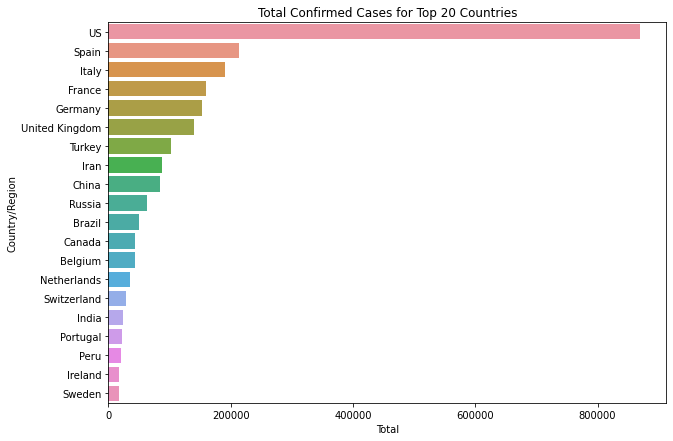

In [366]:
plt.figure(figsize=(10,7))
top_20_confirmed = confirmed.sort_values(confirmed.columns[-1], ascending=False)[:20][confirmed.columns[-1]]
sns.barplot(x=top_20_confirmed, y=top_20_confirmed.index)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total')
plt.title('Total Confirmed Cases for Top 20 Countries')
plt.show()

In [367]:
recovered.sort_values(recovered.columns[-1], ascending=False)[:20][recovered.columns[-1]]

Country/Region
Germany         103300
Spain            89250
US               80203
China            77983
Iran             64843
Italy            57576
France           42762
Brazil           26573
Switzerland      20600
Turkey           18491
Canada           14761
Austria          11694
Belgium           9800
Ireland           9233
Korea, South      8501
Peru              7422
Chile             5804
Israel            5611
Denmark           5573
India             5012
Name: 4/23/20, dtype: int64

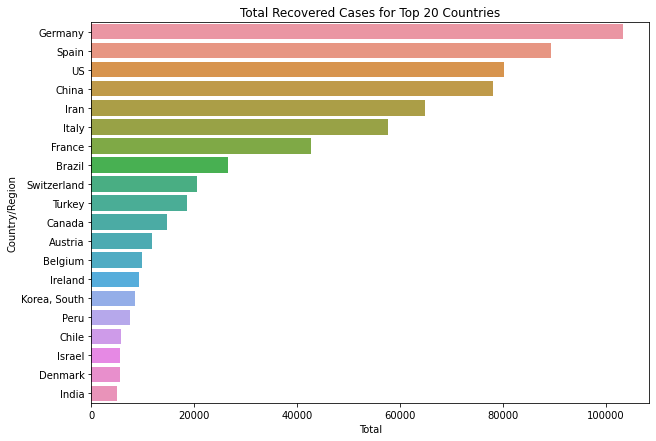

In [368]:
plt.figure(figsize=(10,7))
top_20_recovered = recovered.sort_values(recovered.columns[-1], ascending=False)[:20][recovered.columns[-1]]
ax = sns.barplot(x=top_20_recovered, y=top_20_recovered.index)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total')
plt.title('Total Recovered Cases for Top 20 Countries')
plt.show()

In [369]:
fatality.sort_values(fatality.columns[-1], ascending=False)[:20][fatality.columns[-1]]

Country/Region
US                49954
Italy             25549
Spain             22157
France            21889
United Kingdom    18791
Belgium            6490
Germany            5575
Iran               5481
China              4636
Netherlands        4192
Brazil             3331
Turkey             2491
Canada             2240
Sweden             2021
Switzerland        1549
Mexico             1069
Portugal            820
Ireland             794
India               721
Indonesia           647
Name: 4/23/20, dtype: int64

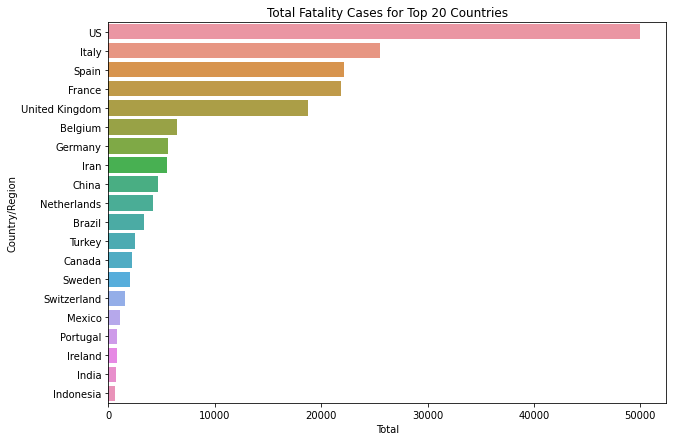

In [370]:
plt.figure(figsize=(10,7))
top_20_fatality = fatality.sort_values(fatality.columns[-1], ascending=False)[:20][fatality.columns[-1]]
ax = sns.barplot(x=top_20_fatality, y=top_20_fatality.index)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total')
plt.title('Total Fatality Cases for Top 20 Countries')
plt.show()

It can be seen that China has the higher number of confirmed cases but US is catching up at a very fast rate. Canada is at 14th place which indicates that the total number of cases have gone up.

China shows tremendous number of recovered cases followed by Spain and Italy. Canada is at 11th place for recovered cases which has not caught up to the confirmed cases in Canada. 

Before, China had the most number of fatalities but Italy and Spain have surpased them by a lot. This could mean that the situation is not under control at these places. Canada is at 17th place, so the fatal cases are way lower than confirmed which is a good sign.

#Canada Trend Analysis

Initialize required data and functions

In [0]:
#This function finds the index where non-zero entry starts.
def find_first_nonzero_index(data):
  index = 0
  for i in range(0, len(data)):
    if data[i] != 0:
      return i
  return index

#helper function to plot confirmed, recovered and fatality cases.
def plot_cases(data_c, data_r, data_f, country_name):
  with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(30, 15))
    sns.scatterplot(x=np.linspace(1, data_c.shape[0], data_c.shape[0]), y=data_c, ax=ax[0, 0])
    ax[0, 0].set_xlabel('Time (Days)')
    ax[0, 0].set_ylabel('Number of Confirmed Cases')
    ax[0, 0].set_title('Confirmed Cases in ' + country_name)

    sns.scatterplot(x=np.linspace(1, data_r.shape[0], data_r.shape[0]), y=data_r, ax=ax[0, 1])
    ax[0, 1].set_xlabel('Time (Days)')
    ax[0, 1].set_ylabel('Number of Recovered Cases')
    ax[0, 1].set_title('Recovered Cases in ' + country_name)

    sns.scatterplot(x=np.linspace(1, data_f.shape[0], data_f.shape[0]), y=data_f, ax=ax[0, 2])
    ax[0, 2].set_xlabel('Time (Days)')
    ax[0, 2].set_ylabel('Number of Fatality Cases')
    ax[0, 2].set_title('Fatality Cases in ' + country_name)

    sns.scatterplot(x=np.linspace(1, data_c.shape[0], data_c.shape[0]), y=np.log(data_c), ax=ax[1, 0])
    ax[1, 0].set_xlabel('Time (Days)')
    ax[1, 0].set_ylabel('Number of Confirmed Cases (log)')
    ax[1, 0].set_title('Log Confirmed Cases in ' + country_name)

    sns.scatterplot(x=np.linspace(1, data_r.shape[0], data_r.shape[0]), y=np.log(data_r), ax=ax[1, 1])
    ax[1, 1].set_xlabel('Time (Days)')
    ax[1, 1].set_ylabel('Number of Recovered Cases (log)')
    ax[1, 1].set_title('Log Recovered Cases in ' + country_name)

    sns.scatterplot(x=np.linspace(1, data_f.shape[0], data_f.shape[0]), y=np.log(data_f), ax=ax[1, 2])
    ax[1, 2].set_xlabel('Time (Days)')
    ax[1, 2].set_ylabel('Number of Fatality Cases (log)')
    ax[1, 2].set_title('Log Fatality Cases in ' + country_name)

    plt.show()

#This function find the sum of squared errors between true and observed values.
def compute_sse(y_true, y_obs):
  return np.sum(np.power(y_true - y_obs, 2.0))

#This function defines the exponential model.
def exponential_model(x, a, b, c):
  return a * np.exp(b*x + c)

#This function defines the logistic model.
def logistic_model(x, L, k, x0, b):
  return L / (1 + np.exp(-k * (x - x0))) + b

def exponential_dist(data):
  # lmbda = 1/np.mean(data)
  # pdf = lmbda * np.exp(-lmbda*data)
  # cdf = 1- np.exp(-lmbda*data)
  loc, scale = scipy.stats.expon.fit(data)
  pdf = scipy.stats.expon.pdf(data, loc=loc, scale=scale)
  cdf = scipy.stats.expon.cdf(data, loc=loc, scale=scale)
  return pdf, cdf

def logistic_dist(data):
  # mu = np.mean(data)
  # s = np.sqrt(3 * np.var(data) / (np.pi**2))
  # pdf = np.exp(-(data - mu)/s)/(s * (1 + np.exp(-(data - mu)/s))**2)
  # cdf = 1 / (1 + np.exp(-(data - mu)/s))
  loc, scale = scipy.stats.logistic.fit(data)
  pdf = scipy.stats.logistic.pdf(data, loc=loc, scale=scale)
  cdf = scipy.stats.logistic.cdf(data, loc=loc, scale=scale)
  return pdf, cdf

In [0]:
#This function plots the exponential distribution along with exponential fit to the data.
def plot_exponential_fit(data, country_name, max_days, extrapol_days, a0=1, b0=1, c0=1):
  plt.close()
  #Determine the PDF and CDF to the data.
  pdf, cdf = exponential_dist(data)

  with sns.axes_style("darkgrid"):
    # fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(30, 10))
    # fig, (ax1, ax2, ax4) = plt.subplots(ncols=3, figsize=(30, 10))
    
    #ax1: plot the PDF
    # These 3 lines below only kept for code reference. So don't uncomment.
    # pdf_hist = sns.distplot(data, bins=max_days, kde=False, norm_hist=True, label="Histogram", ax=ax1)
    # pdf_hist_values = [h.get_height() for h in pdf_hist.patches]
    # print("exp PDF SSE: " + str(find_sse(pdf_hist_values, pdf)))

    # sns.distplot(data, bins=max_days, kde=False, norm_hist=True, label="Histogram", ax=ax1)
    # sns.lineplot(data, pdf, label="PDF", ax=ax1, linewidth=2, color=sns.xkcd_rgb["pale red"])
    # ax1.set_ylabel("")
    # ax1.set_xlabel("")
    # ax1.set_title("PDF and Histogram for Cases in " + country_name)

    #ax2: plot the CDF
    # These 3 lines below only kept for code reference. So don't uncomment.
    # cdf_hist = sns.distplot(data, bins=max_days, kde=False, hist_kws={'cumulative': True}, norm_hist=True, label="Cumulative Histogram", ax=ax2)
    # cdf_hist_values = [h.get_height() for h in cdf_hist.patches]
    # print("exp CDF SSE: " + str(find_sse(cdf_hist_values, cdf)))

    # sns.distplot(data, bins=max_days, kde=False, hist_kws={'cumulative': True}, norm_hist=True, label="Cumulative Histogram", ax=ax2)
    # sns.lineplot(data, cdf, label="CDF", ax=ax2, linewidth=2, color=sns.xkcd_rgb["pale red"])
    # ax2.set_ylabel("")
    # ax2.set_xlabel("")
    # ax2.set_title("CDF and Cumulative Histogram for Cases in " + country_name)

    #ax3: plot qq plot
    # sm.qqplot(data, dist=scipy.stats.expon, line="s", ax=ax3, color=sns.color_palette("Blues_d")[3])
    # ax3.set_title("Exponential Distribution QQ Plot for Cases in " + country_name)

    #ax4: plot curve fit
    #Fit exponential function to the data.
    fig = plt.figure(figsize=(10,10))
    ax4 = fig.add_subplot(111)
    
    t = np.linspace(1, data.shape[0], data.shape[0])
    p0 = [a0, b0, c0]
    method = ["lm", "trf", "dogbox"]
    fit_values, pcov = scipy.optimize.curve_fit(exponential_model, t, data, p0=p0, absolute_sigma=True)

    data_hat = exponential_model(t, *fit_values)
    r2 = r2_score(data, data_hat)
    mse = mean_squared_error(data, data_hat)

    t1 = np.linspace(0, extrapol_days)
    predicted_data = exponential_model(t1, *fit_values)

    sns.scatterplot(x=t, y=data, ax=ax4, label="Actual Data")
    sns.lineplot(x=t1, y=predicted_data, ax=ax4, linewidth=2, label="Exponential Fit", color=sns.xkcd_rgb["pale red"])
    ax4.plot([], [], " ", label="MSE: " + str(round(mse, 2)))
    ax4.plot([], [], " ", label="R-squared: " + str(round(r2, 5)))

    handles,labels = ax4.get_legend_handles_labels()
    handles = [handles[0], handles[3], handles[2], handles[1]]
    labels = [labels[0], labels[3], labels[2], labels[1]]

    ax4.legend(handles,labels,loc=2)
    ax4.set_xlabel("Time (Days)")
    ax4.set_ylabel("Number of Cases")
    ax4.set_title("Exponential fit for Cases in " + country_name)

    fig.show()

In [0]:
#This function plots the logistic distribution along with the logistic fit to the data.
def plot_logistic_fit(data, country_name, max_days, extrapol_days):
  #Determine the PDF and CDF to the data.
  pdf, cdf = logistic_dist(data)

  with sns.axes_style("darkgrid"):
    # fig, [ax1, ax2, ax3, ax4] = plt.subplots(ncols=4, figsize=(30, 10))
    # fig, [ax1, ax2, ax4] = plt.subplots(ncols=3, figsize=(30, 10))

    #ax1: plot PDF
    # These 3 lines below only kept for code reference. So don't uncomment.
    # pdf_hist = sns.distplot(data, bins=max_days, kde=False, norm_hist=True, label="Histogram", ax=ax1)
    # pdf_hist_values = [h.get_height() for h in pdf_hist.patches]
    # print("log PDF SSE: " + str(find_sse(pdf_hist_values, pdf)))

    # sns.distplot(data, bins=max_days, kde=False, norm_hist=True, label="Histogram", ax=ax1)
    # sns.lineplot(data, pdf, label="PDF", ax=ax1, linewidth=2.5, color=sns.xkcd_rgb["pale red"])
    # ax1.set_ylabel("")
    # ax1.set_xlabel("")
    # ax1.set_title("Histogram and PDF for Cases in " + country_name)

    #ax2: plot CDF
    # These 3 lines below only kept for code reference. So don't uncomment.
    # cdf_hist = sns.distplot(data, bins=max_days, kde=False, hist_kws={'cumulative': True}, norm_hist=True, label="Cumulative Histogram", ax=ax2)
    # cdf_hist_values = [h.get_height() for h in cdf_hist.patches]
    # print("log CDF SSE: " + str(find_sse(cdf_hist_values, cdf)))

    # sns.distplot(data, bins=max_days, kde=False, hist_kws={'cumulative': True}, norm_hist=True, label="Cumulative Histogram", ax=ax2)
    # sns.lineplot(data, cdf, label="CDF", ax=ax2, linewidth=2, color=sns.xkcd_rgb["pale red"])
    # ax2.set_ylabel("")
    # ax2.set_xlabel("")
    # ax2.set_title("CDF for Cases in " + country_name)

    #ax3: plot QQ plot
    # sm.qqplot(data, dist=scipy.stats.logistic, line="s", ax=ax3, color=sns.color_palette("Blues_d")[3])
    # ax3.set_title("Logistic Distribution QQ Plot for Cases in " + country_name)
    
    #ax4: plot curve fit
    #Fit exponential function to the data.
    fig = plt.figure(figsize=(10,10))
    ax4 = fig.add_subplot(111)

    t = np.linspace(1, data.shape[0], data.shape[0])
    p0 = [max(data), 1, np.median(t), min(data)]
    method = ["lm", "trf", "dogbox"]
    for m in method:
      try:
        fit_values, pcov = scipy.optimize.curve_fit(logistic_model, t, data, p0=p0, method=m, absolute_sigma=True)
      except:
        pass

    data_hat = logistic_model(t, *fit_values)
    r2 = r2_score(data, data_hat)
    mse = mean_squared_error(data, data_hat)

    t1 = np.linspace(0, extrapol_days)
    predicted_data = logistic_model(t1, *fit_values)

    inflection_point = (fit_values[2], logistic_model(fit_values[2], *fit_values))
    
    sns.scatterplot(x=t, y=data, ax=ax4, label="Actual Data")
    sns.lineplot(x=t1, y=predicted_data, ax=ax4, label="Logistic Fit", color=sns.xkcd_rgb["pale red"])
    ax4.scatter(inflection_point[0], inflection_point[1], label="Inflection Point", color=sns.xkcd_rgb["crimson"], linewidths=2)
    ax4.plot([], [], " ", label="MSE: " + str(round(mse, 2)))
    ax4.plot([], [], " ", label="R-squared: " + str(round(r2, 5)))

    handles,labels = ax4.get_legend_handles_labels()
    handles = [handles[0], handles[3], handles[4], handles[2], handles[1]]
    labels = [labels[0], labels[3], labels[4], labels[2], labels[1]]

    ax4.legend(handles,labels,loc=2)
    ax4.set_xlabel("Time (Days)")
    ax4.set_ylabel("Number of Cases")
    ax4.set_title("Logistic fit for Cases in " + country_name)

    plt.show()

In [0]:
confirmed_data = confirmed_data.drop(["Province/State", "Lat", "Long"], axis=1)
recovered_data = recovered_data.drop(["Province/State", "Lat", "Long"], axis=1)
fatality_data = fatality_data.drop(["Province/State", "Lat", "Long"], axis=1)

In [0]:
canada_confirmed_data = confirmed_data[confirmed_data["Country/Region"] == "Canada"]
canada_confirmed_data = canada_confirmed_data.drop("Country/Region", axis=1)
canada_confirmed_data = canada_confirmed_data.sum()

canada_recovered_data = recovered_data[recovered_data["Country/Region"] == "Canada"]
canada_recovered_data = canada_recovered_data.drop("Country/Region", axis=1)
canada_recovered_data = canada_recovered_data.sum()

canada_fatality_data = fatality_data[fatality_data["Country/Region"] == "Canada"]
canada_fatality_data = canada_fatality_data.drop("Country/Region", axis=1)
canada_fatality_data = canada_fatality_data.sum()

In [376]:
canada_confirmed_data

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        1
           ...  
4/19/20    35632
4/20/20    37657
4/21/20    39401
4/22/20    41648
4/23/20    43285
Length: 93, dtype: int64

In [377]:
canada_recovered_data

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/19/20    11847
4/20/20    12543
4/21/20    13188
4/22/20    14454
4/23/20    14761
Length: 93, dtype: int64

In [378]:
canada_fatality_data

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
4/19/20    1563
4/20/20    1725
4/21/20    1908
4/22/20    2075
4/23/20    2240
Length: 93, dtype: int64

In [0]:
canada_confirmed_data = canada_confirmed_data[find_first_nonzero_index(canada_confirmed_data):]
canada_recovered_data = canada_recovered_data[find_first_nonzero_index(canada_recovered_data):]
canada_fatality_data = canada_fatality_data[find_first_nonzero_index(canada_fatality_data):]

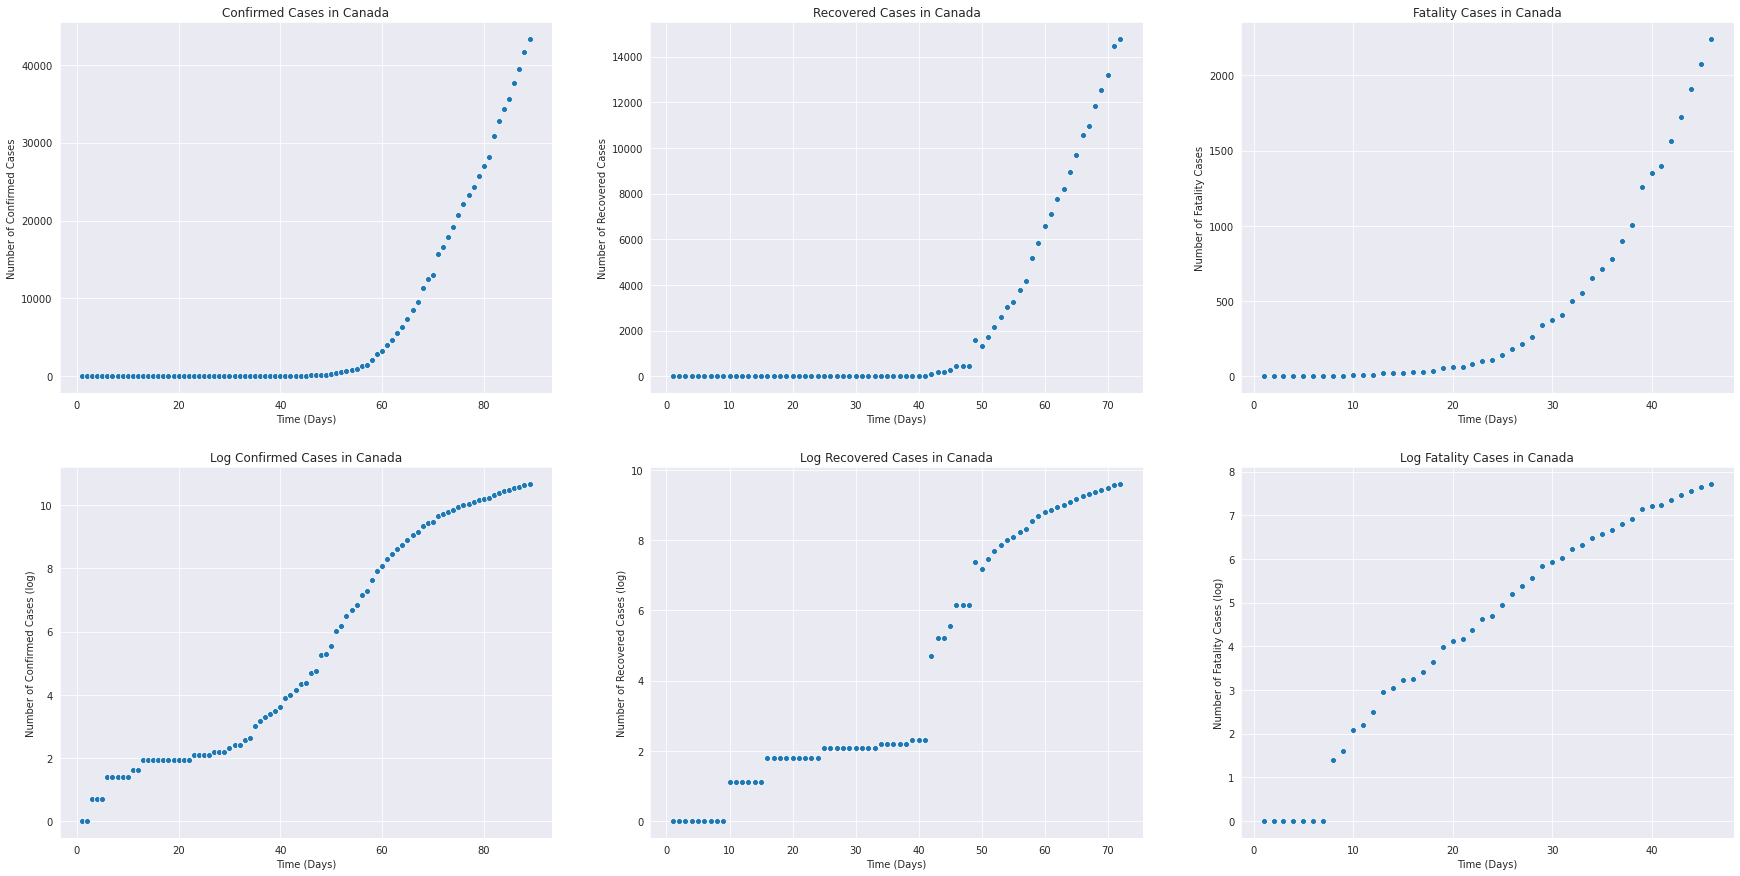

In [380]:
plot_cases(canada_confirmed_data, canada_recovered_data, canada_fatality_data, "Canada")

The above graph show that Canada seems to follow an exponential trend for confirmed, recovered and fatality cases. Lets analyze what kind of trend do the cases in Canada follow and confirm whether it is exponential or logistic trend. Therefore, fit the curve for these two functions and see which one has lower mean squared error.

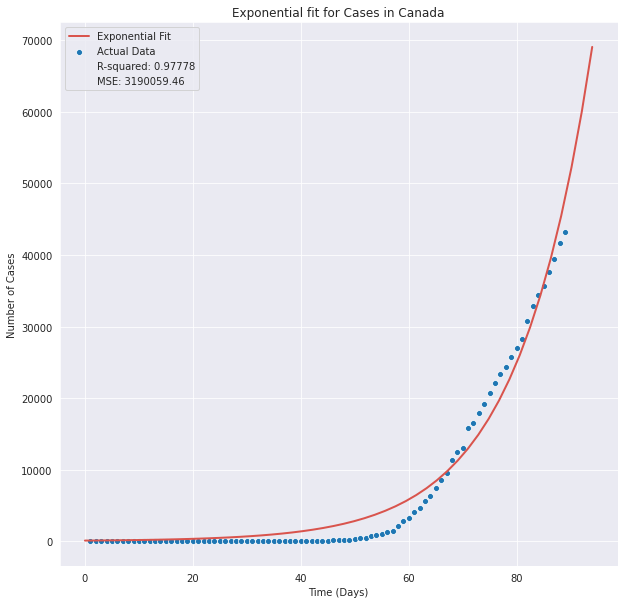

In [381]:
i =1
count = True
maxx = 100
while count and i < maxx:
  try:
    plot_exponential_fit(canada_confirmed_data, "Canada", canada_confirmed_data.shape[0], canada_confirmed_data.shape[0]+5, c0=i)
    count=False
  except:
    i +=1

plot_exponential_fit(canada_confirmed_data, "Canada", canada_confirmed_data.shape[0], canada_confirmed_data.shape[0]+5, c0=i)

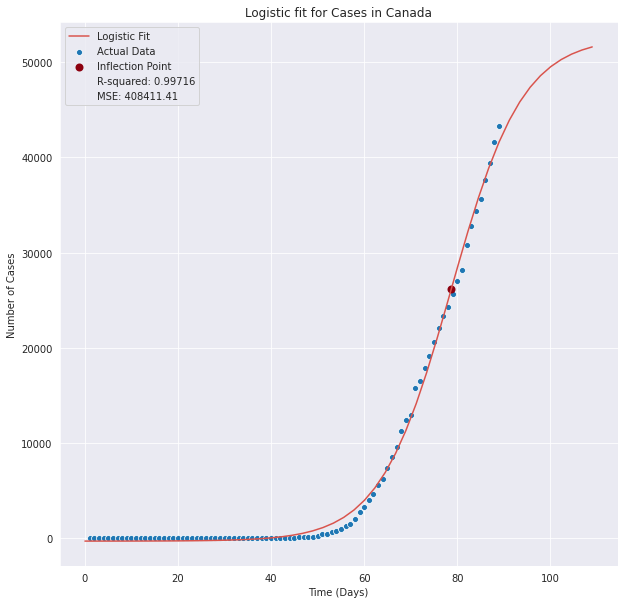

In [382]:
plot_logistic_fit(canada_confirmed_data, "Canada", canada_confirmed_data.shape[0], canada_confirmed_data.shape[0]+20)

It can be seen that Logistic function is a better fit and also has a lower mean squared error.

#SIR Model

In [0]:
#Determine the total number of cases so far for each type of case
total_confirmed_cases = canada_confirmed_data[0]
total_recovered_cases = canada_recovered_data[0]
total_fatality_cases = canada_fatality_data[0]

for i in range(1, len(canada_confirmed_data)):
  total_confirmed_cases += canada_confirmed_data[i] - canada_confirmed_data[i-1]

for i in range(1, len(canada_recovered_data)):
  total_recovered_cases += canada_recovered_data[i] - canada_recovered_data[i-1]

for i in range(1, len(canada_fatality_data)):
  total_fatality_cases += canada_fatality_data[i] - canada_fatality_data[i-1]

In [0]:
#Define the SIR model as a system of quadratic ODE
def sir_model(y, t, N, beta, gamma):
  S = y[0]
  I = y[1]
  R = y[2]
  dSdt = -beta * S * I / N
  dIdt = (beta * S * I / N) - (gamma * I)
  dRdt = gamma * I

  return dSdt, dIdt, dRdt

In [0]:
#Canada's total population
N = population_data[population_data['Country (or dependency)'] == 'Canada']['Population (2020)'].iloc[0]
#The number of infected people
I0 = total_confirmed_cases
#The number of recovered people
R0 = total_confirmed_cases + total_fatality_cases
#Whoever is not infected or recovered is considered susceptible
S0 = N - I0 - R0

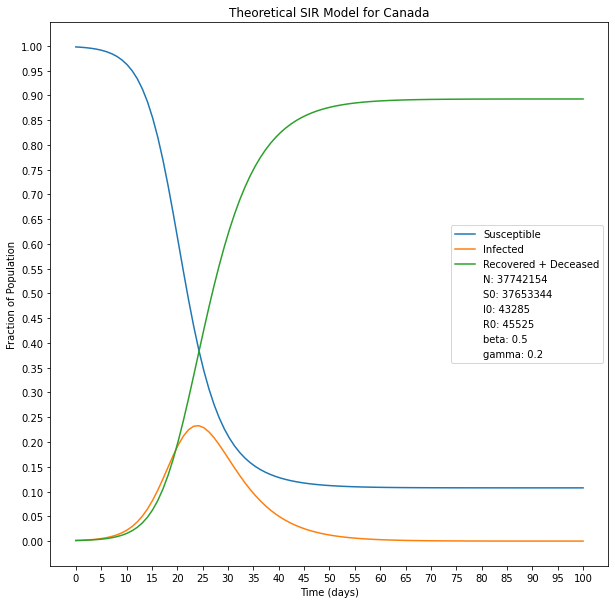


Actual population affected: 0.11%


In [386]:
#Define the beta which is disease transmission rate and greater than 0
#how often a susceptible-infected contact results in a new infection
beta = 0.5
#Define the recovery rate which is greater than zero and depends on how many 
#days the infection lasts. For COVID-19, 14 days is the maximum
#number of days for incubation period. 5 days is the average incubation period.
#https://www.who.int/news-room/q-a-detail/q-a-coronaviruses
D = 5
gamma = 1/D

#Set the initial conditions for the scipy integration function
y0 = S0, I0, R0

#How many days we want to run the model for
n_days = 100
t = np.linspace(0, n_days, n_days)

#use scipy ODE integrate function to find the solution
sol = scipy.integrate.odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = sol.T

#Plot the model
plt.figure(figsize=(10, 10))
sns.lineplot(t, S/N, label="Susceptible")
sns.lineplot(t, I/N, label="Infected")
sns.lineplot(t, R/N, label="Recovered + Deceased")
plt.plot([],[], " ", label="N: " + str(N))
plt.plot([],[], " ", label="S0: " + str(S0))
plt.plot([],[], " ", label="I0: " + str(I0))
plt.plot([],[], " ", label="R0: " + str(R0))
plt.plot([],[], " ", label="beta: " + str(beta))
plt.plot([],[], " ", label="gamma: " + str(gamma))
plt.xlabel("Time (days)")
plt.ylabel("Fraction of Population")
plt.title("Theoretical SIR Model for Canada")
plt.legend(loc="center right")
plt.xticks(np.arange(0, n_days+1, 5))
plt.yticks(np.arange(0.0, 1.00001, 0.05))
plt.show()

print("")
print("Actual population affected: " + str(round(total_confirmed_cases / N *100, 2)) + "%")

In [389]:
np.min(S) / N

0.4168714893861718

We can see that with beta being 0.5 and gamma being 0.2, the number of infected cases increase until day 26 where it encompasses approximately 23% of the population and then it decreases given that the number of recovered and deceased cases increase.

The susceptible population decreases quickly until approximately day 35 and then it flattens out where approximately 20% of the population still remains susceptible.

The number of recovered and deceased cases increase until approximately day 50 encompassing approximately 89% of the population and then it flattens out.

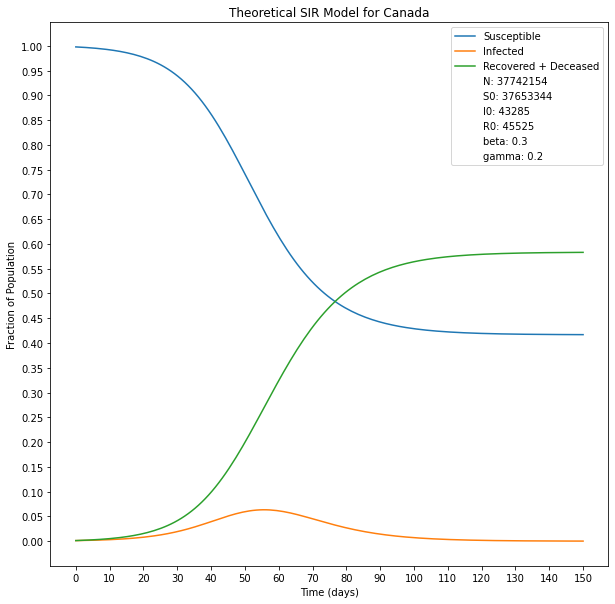

In [390]:
#Define the beta which is disease transmission rate and greater than 0
#how often a susceptible-infected contact results in a new infection
beta = 0.3
#Define the recovery rate which is greater than zero and depends on how many 
#days the infection lasts. For COVID-19, 14 days is the maximum
#number of days for incubation period. 5 days is the average incubation period.
#https://www.who.int/news-room/q-a-detail/q-a-coronaviruses
D = 5
gamma = 1/D

#Set the initial conditions for the scipy integration function
y0 = S0, I0, R0

#How many days we want to run the model for
n_days = 150
t = np.linspace(0, n_days, n_days)

#use scipy ODE integrate function to find the solution
sol = scipy.integrate.odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = sol.T

#Plot the model
plt.figure(figsize=(10, 10))
sns.lineplot(t, S/N, label="Susceptible")
sns.lineplot(t, I/N, label="Infected")
sns.lineplot(t, R/N, label="Recovered + Deceased")
plt.plot([],[], " ", label="N: " + str(N))
plt.plot([],[], " ", label="S0: " + str(S0))
plt.plot([],[], " ", label="I0: " + str(I0))
plt.plot([],[], " ", label="R0: " + str(R0))
plt.plot([],[], " ", label="beta: " + str(beta))
plt.plot([],[], " ", label="gamma: " + str(gamma))
plt.xlabel("Time (days)")
plt.ylabel("Fraction of Population")
plt.title("Theoretical SIR Model for Canada")
plt.legend(loc="upper right")
plt.xticks(np.arange(0, n_days+1, 10))
plt.yticks(np.arange(0.0, 1.00001, 0.05))
plt.show()

This time setting the transmission rate to 0.3 with gamma being 0.2, we can see that virus spreads much slower and takes approximately 62 days to affect 6% of the population and then decreasing down.

There are also smaller number of recovered and deceased cases which encompass approximately 58% of the population and took approximately 110 days to reach the maximum number of recovered and deceased cases. 

There is also a smaller drop in the susceptible population where after day 95 it stay approximately at 41% of the population.

#Data preparation

Create the new dataset from combining confirmed, recovered and fatality cases for each country.

In [0]:
#This function checks whether the given data is a weekday.
def check_weekday(date):
  if date.isoweekday() in range(1,6):
    return 1
  else:
    return 0

#This function checks whether the given date is a holiday.
def check_holiday(date):
  if date in holidays.US(years=2020):
    return 1
  else:
    return 0

#This function extracts information related to date.
def extract_date_info(date_list):
  extracted_info = {"date": [], "year": [], "month": [], "day": [], "day_count": [], "is_weekday": [], "is_holiday": []}

  for i, date in enumerate(date_list):
    split_date = date.split("/")
    year = int("20" + split_date[2])
    month = int(split_date[0])
    day = int(split_date[1])
    datetime_date = datetime.date(year, month, day)

    extracted_info["date"].append(datetime_date)
    extracted_info["year"].append(year)
    extracted_info["month"].append(month)
    extracted_info["day"].append(day)
    extracted_info["day_count"].append(i + 1)
    extracted_info["is_weekday"].append(check_weekday(datetime_date))
    extracted_info["is_holiday"].append(check_holiday(datetime_date))

  return extracted_info

#This function extracts data for each of the cases and creates a DataFrame.
def create_dataframe(data, country, lag):
  # extract the dates 
  dates = data[data["Country/Region"] == country].columns[1:]

  #extract confirmed cases for the country
  cases = data[data["Country/Region"] == country][dates].sum(axis=0)
  # start_index = find_first_nonzero_index(cases)
  # cases = cases[start_index: ]

  #extract information from the dates
  extracted_date_info = extract_date_info(dates)

  data_dict = {
              #  "date": extracted_date_info["date"], 
               "year": extracted_date_info["year"], 
               "month": extracted_date_info["month"], 
               "day": extracted_date_info["day"], 
               "day_count": extracted_date_info["day_count"],
               "is_weekday": extracted_date_info["is_weekday"],
               "log_cases": np.log1p(cases)}

  #compute the lags for each type of case
  #compute the trend for each day for each type of case where trend if defined as
  # (x(t) - x(t-1)) / x(t-1), t is time
  #here i defines how many days back do we want the lag to be
  for i in range(1, lag + 1):
    data_dict["log_lag_" + str(i)] = np.log1p(cases.shift(i, fill_value=0))
    trend = (cases - cases.shift(i, fill_value=0)) / cases.shift(i, fill_value=0)
    data_dict["log_trend_" + str(i)] = np.log1p(trend.replace([np.inf, -np.inf], 0).fillna(0))
  
  return pd.DataFrame(data_dict)

# This function adds the population data into the existing dataset.
def add_population_data(data, population_data):
  data['population'] = population_data[population_data['Country (or dependency)'] == 'Canada']['Population (2020)'].iloc[0]
  data['density'] = population_data[population_data['Country (or dependency)'] == 'Canada']['Density (P/Km²)'].iloc[0]
  data['median_age'] = population_data[population_data['Country (or dependency)'] == 'Canada']['Med. Age'].iloc[0]
  return data

In [0]:
# create the data frame for modified dataset
# the lag and trend will be for 7 days
df_confirmed = create_dataframe(confirmed_data, 'Canada', 7)
df_recovered = create_dataframe(recovered_data, 'Canada', 7)
df_fatality = create_dataframe(fatality_data, 'Canada', 7)

# add the population data
df_confirmed = add_population_data(df_confirmed, population_data)
df_recovered = add_population_data(df_recovered, population_data)
df_fatality = add_population_data(df_fatality, population_data)

In [393]:
df_confirmed

,year,month,day,day_count,is_weekday,log_cases,log_lag_1,log_trend_1,log_lag_2,log_trend_2,log_lag_3,log_trend_3,log_lag_4,log_trend_4,log_lag_5,log_trend_5,log_lag_6,log_trend_6,log_lag_7,log_trend_7,population,density,median_age
1/22/20,2020,1,22,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37742154,4,41
1/23/20,2020,1,23,2,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37742154,4,41
1/24/20,2020,1,24,3,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37742154,4,41
1/25/20,2020,1,25,4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37742154,4,41
1/26/20,2020,1,26,5,0,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37742154,4,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/19/20,2020,4,19,89,0,10.481027,10.444532,0.036497,10.398611,0.082419,10.335562,0.145470,10.247396,0.233638,10.204888,0.276149,10.153468,0.327571,10.098190,0.382850,37742154,4,41
4/20/20,2020,4,20,90,1,10.536301,10.481027,0.055275,10.444532,0.091771,10.398611,0.137694,10.335562,0.200744,10.247396,0.288913,10.204888,0.331424,10.153468,0.382845,37742154,4,41
4/21/20,2020,4,21,91,1,10.581572,10.536301,0.045272,10.481027,0.100547,10.444532,0.137044,10.398611,0.182966,10.335562,0.246017,10.247396,0.334186,10.204888,0.376696,37742154,4,41
4/22/20,2020,4,22,92,1,10.637033,10.581572,0.055462,10.536301,0.100734,10.481027,0.156009,10.444532,0.192506,10.398611,0.238429,10.335562,0.301479,10.247396,0.389648,37742154,4,41


Train linear regression model for confirmed cases. To split the datasets into training and testing sets. Here I will use the split ratio as 80% training and 20% testing.

In [0]:
# This function will perform linear regression on the provided dataset.
def perform_linear_regression(x, split_point):
  train = x[: split_point]
  train_x = train.loc[:, train.columns != 'log_cases']
  train_y = train['log_cases']

  test = x[split_point:]
  test_x = test.loc[:, test.columns != 'log_cases']
  test_y = test['log_cases']

  lr = LinearRegression()
  lr.fit(train_x, train_y)
  prediction = lr_confirmed.predict(test_x)
  print("Linear Regression MSE for Confirmed Cases: " + str(mean_squared_error(test_y, prediction)))
  print("Linear Regression R2 Score: " + str(r2_score(test_y, prediction)))

Perform Linear Regression on Confirmed Cases

In [395]:
split_point = len(df_confirmed) * 80 // 100 + 1
perform_linear_regression(df_confirmed, split_point)

Linear Regression MSE for Confirmed Cases: 0.00025810599766244485
Linear Regression R2 Score: 0.9969399625708


Perform Linear Regression on Recovered Cases

In [396]:
split_point = len(df_confirmed) * 80 // 100 + 1
perform_linear_regression(df_recovered, split_point)

Linear Regression MSE for Confirmed Cases: 0.0018708674740010266
Linear Regression R2 Score: 0.9908814712637873


Perform Linear Regression on Recovered Cases

In [397]:
split_point = len(df_confirmed) * 80 // 100 + 1
perform_linear_regression(df_fatality, split_point)

Linear Regression MSE for Confirmed Cases: 0.007137520189097777
Linear Regression R2 Score: 0.9798196102407939
